<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Auto_EDA_WPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7erqIBp3mSu7dt_ThDL9BEgD0Ls_JDi-_85hn6GMDZ1upraCws_2U
Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

In [5]:
df.head()

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,Excellent


In [6]:
#lets remove the column 'unnamed'

df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [7]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')



In [8]:
df.columns

Index(['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'K', 'F', 'Cl',
       'Nitrate', 'Sulphate', 'Phosphate', 'WPI', 'WQC'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    float64
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    float64
 7   Mg          487 non-null    float64
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
 15  WQC         487 non-null    object 
dtypes: float64(15), object(1)
memory usage: 61.0+ KB


In [10]:
#### numerical data stats
df.select_dtypes(exclude = 'object').describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,485.000000,487.000000
mean,7.809275,7.441561,115.752156,62.225873,196.536591,8.906119,43.683778,24.361396,3.036222,0.511795,14.175075,1.286371,14.791693,0.089608,0.293491
std,0.411216,1.107170,47.283961,20.068358,81.088229,5.719637,17.846355,10.815360,2.304195,0.494124,9.279435,1.838680,14.644176,0.156697,0.132387
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.560000,6.700000,84.000000,50.000000,140.000000,5.295000,32.000000,16.000000,1.735000,0.249000,8.625625,0.244000,5.472000,0.023700,0.221584
50%,7.860000,7.400000,102.000000,56.000000,171.000000,7.100000,40.000000,22.000000,2.410000,0.312000,11.100000,0.527000,9.450000,0.046253,0.254116
75%,8.100000,8.100000,129.000000,72.000000,219.500000,10.235000,52.000000,28.000000,3.400000,0.468000,16.370625,1.506928,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [11]:
# categorical data stats
df.select_dtypes(exclude= ['int64','float']).describe()

,WQC
count,487
unique,4
top,Excellent
freq,460


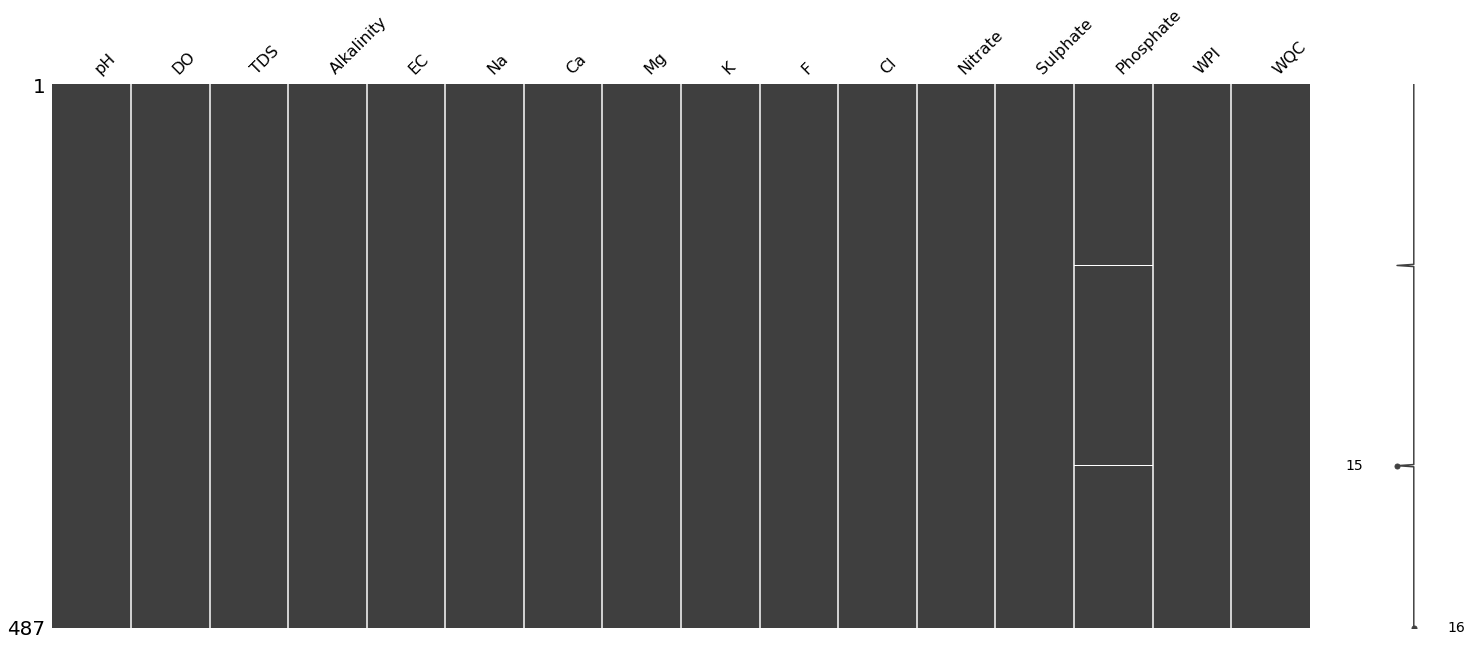

In [12]:
#Visualize missing values

import missingno as msno
msno.matrix(df)

We can see from above figure that phosphate columns has missing values

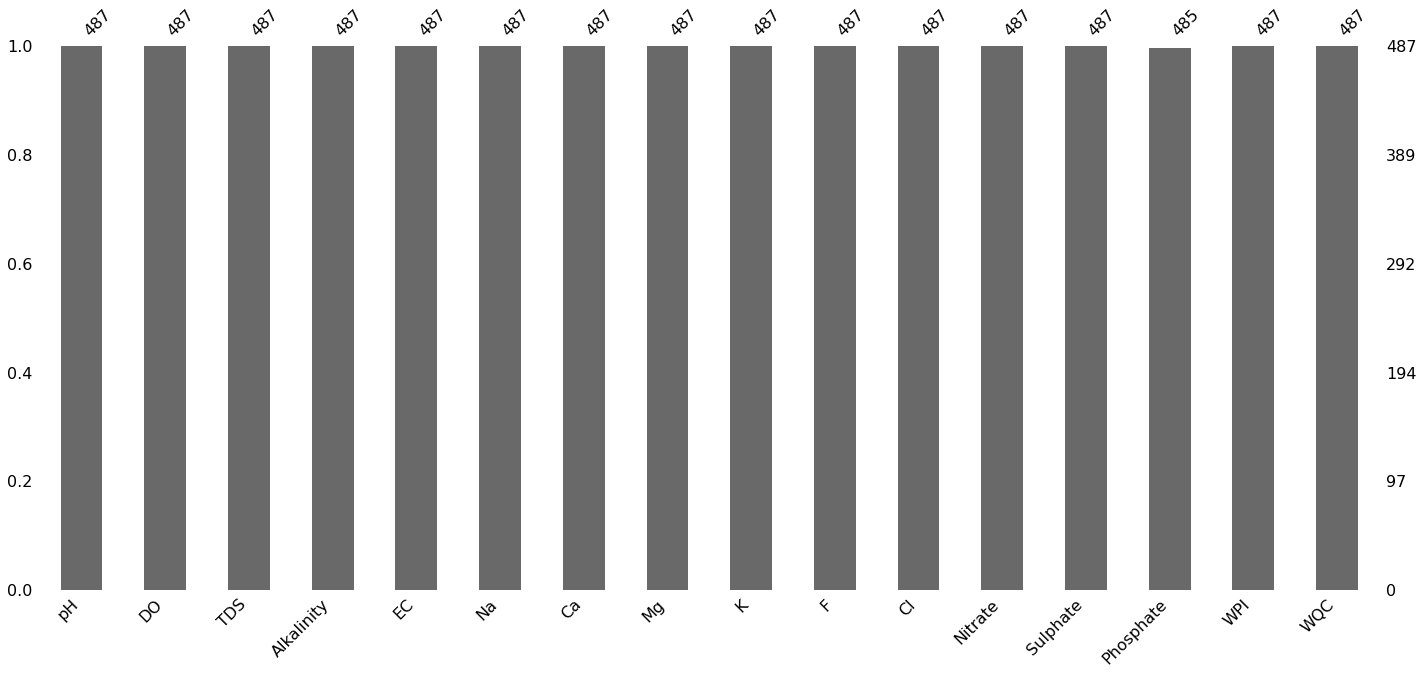

In [13]:
msno.bar(df)

In [14]:
#We will remove the rows having null values

df = df.dropna(how='any',axis=0) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
 15  WQC         485 non-null    object 
dtypes: float64(15), object(1)
memory usage: 64.4+ KB


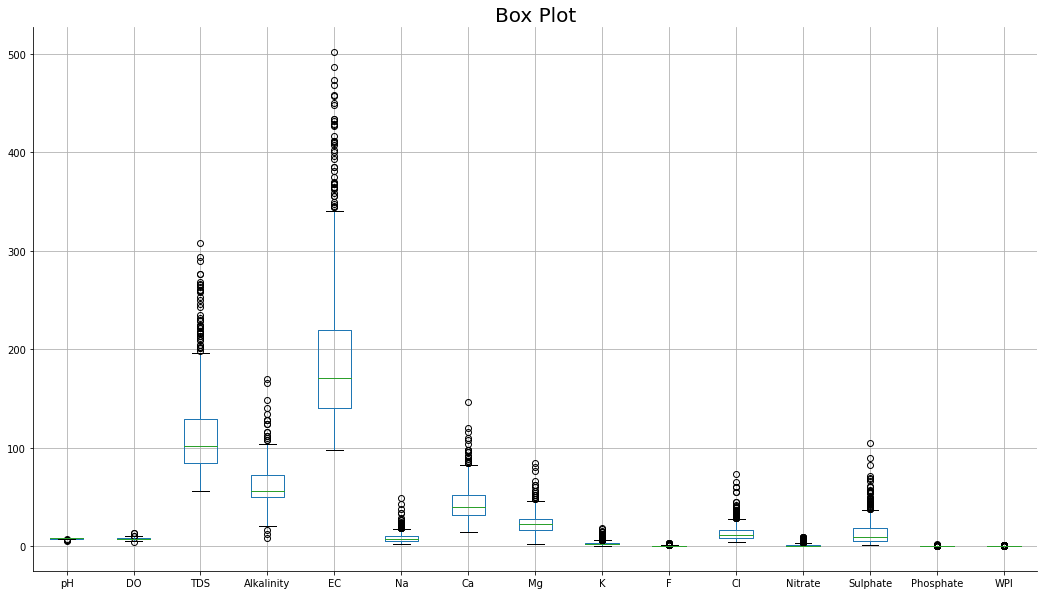

In [16]:
%matplotlib inline

plt.figure(figsize=(18,10))
df.boxplot()
plt.title("Box Plot", fontsize=20)
plt.show()


In [18]:
#check correlation

df.corr()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
pH,1.000000,0.211109,-0.236712,0.175510,-0.243521,-0.273298,-0.103435,-0.060885,-0.344524,-0.227349,-0.294046,-0.396854,-0.386411,-0.040246,-0.004190
DO,0.211109,1.000000,-0.222928,-0.036796,-0.226791,-0.181963,-0.182463,-0.067469,-0.268489,-0.232656,-0.177212,-0.139853,-0.291412,0.066248,-0.087564
TDS,-0.236712,-0.222928,1.000000,0.637716,0.984754,0.833671,0.892126,0.705149,0.754319,0.744330,0.841918,0.539486,0.831473,0.077804,0.508326
Alkalinity,0.175510,-0.036796,0.637716,1.000000,0.614956,0.381228,0.696089,0.658814,0.289176,0.360956,0.384024,0.094369,0.229730,-0.025792,0.306938
EC,-0.243521,-0.226791,0.984754,0.614956,1.000000,0.821030,0.880295,0.687292,0.744921,0.732718,0.826369,0.534420,0.833973,0.091789,0.513956
Na,-0.273298,-0.181963,0.833671,0.381228,0.821030,1.000000,0.634518,0.500436,0.709595,0.633003,0.973823,0.480209,0.660852,0.105225,0.437277
Ca,-0.103435,-0.182463,0.892126,0.696089,0.880295,0.634518,1.000000,0.585701,0.585581,0.624190,0.635604,0.413112,0.729384,0.039442,0.462190
Mg,-0.060885,-0.067469,0.705149,0.658814,0.687292,0.500436,0.585701,1.000000,0.462190,0.562817,0.526408,0.276092,0.538041,0.004944,0.331117
K,-0.344524,-0.268489,0.754319,0.289176,0.744921,0.709595,0.585581,0.462190,1.000000,0.633910,0.728000,0.599805,0.704721,0.064916,0.376962
F,-0.227349,-0.232656,0.744330,0.360956,0.732718,0.633003,0.624190,0.562817,0.633910,1.000000,0.651898,0.556951,0.713750,0.090891,0.478907


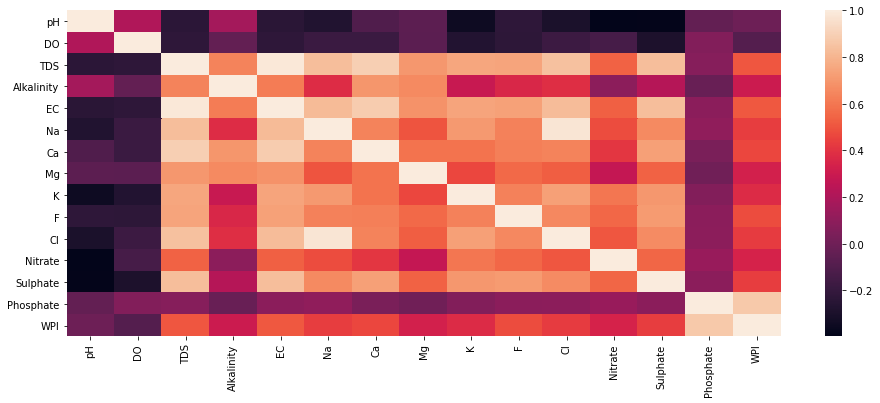

In [20]:
plt.figure(figsize=(16, 6))

sns.heatmap(df.corr())

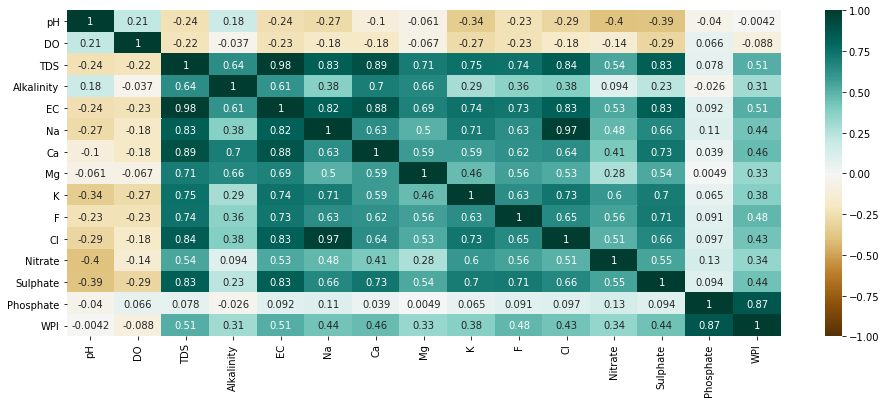

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

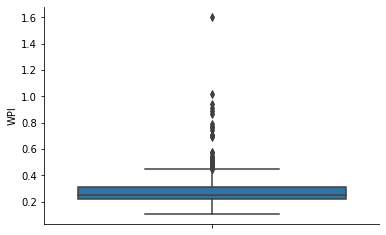

In [26]:
sns.boxplot(y=df['WPI'])

<Figure size 1152x432 with 0 Axes>

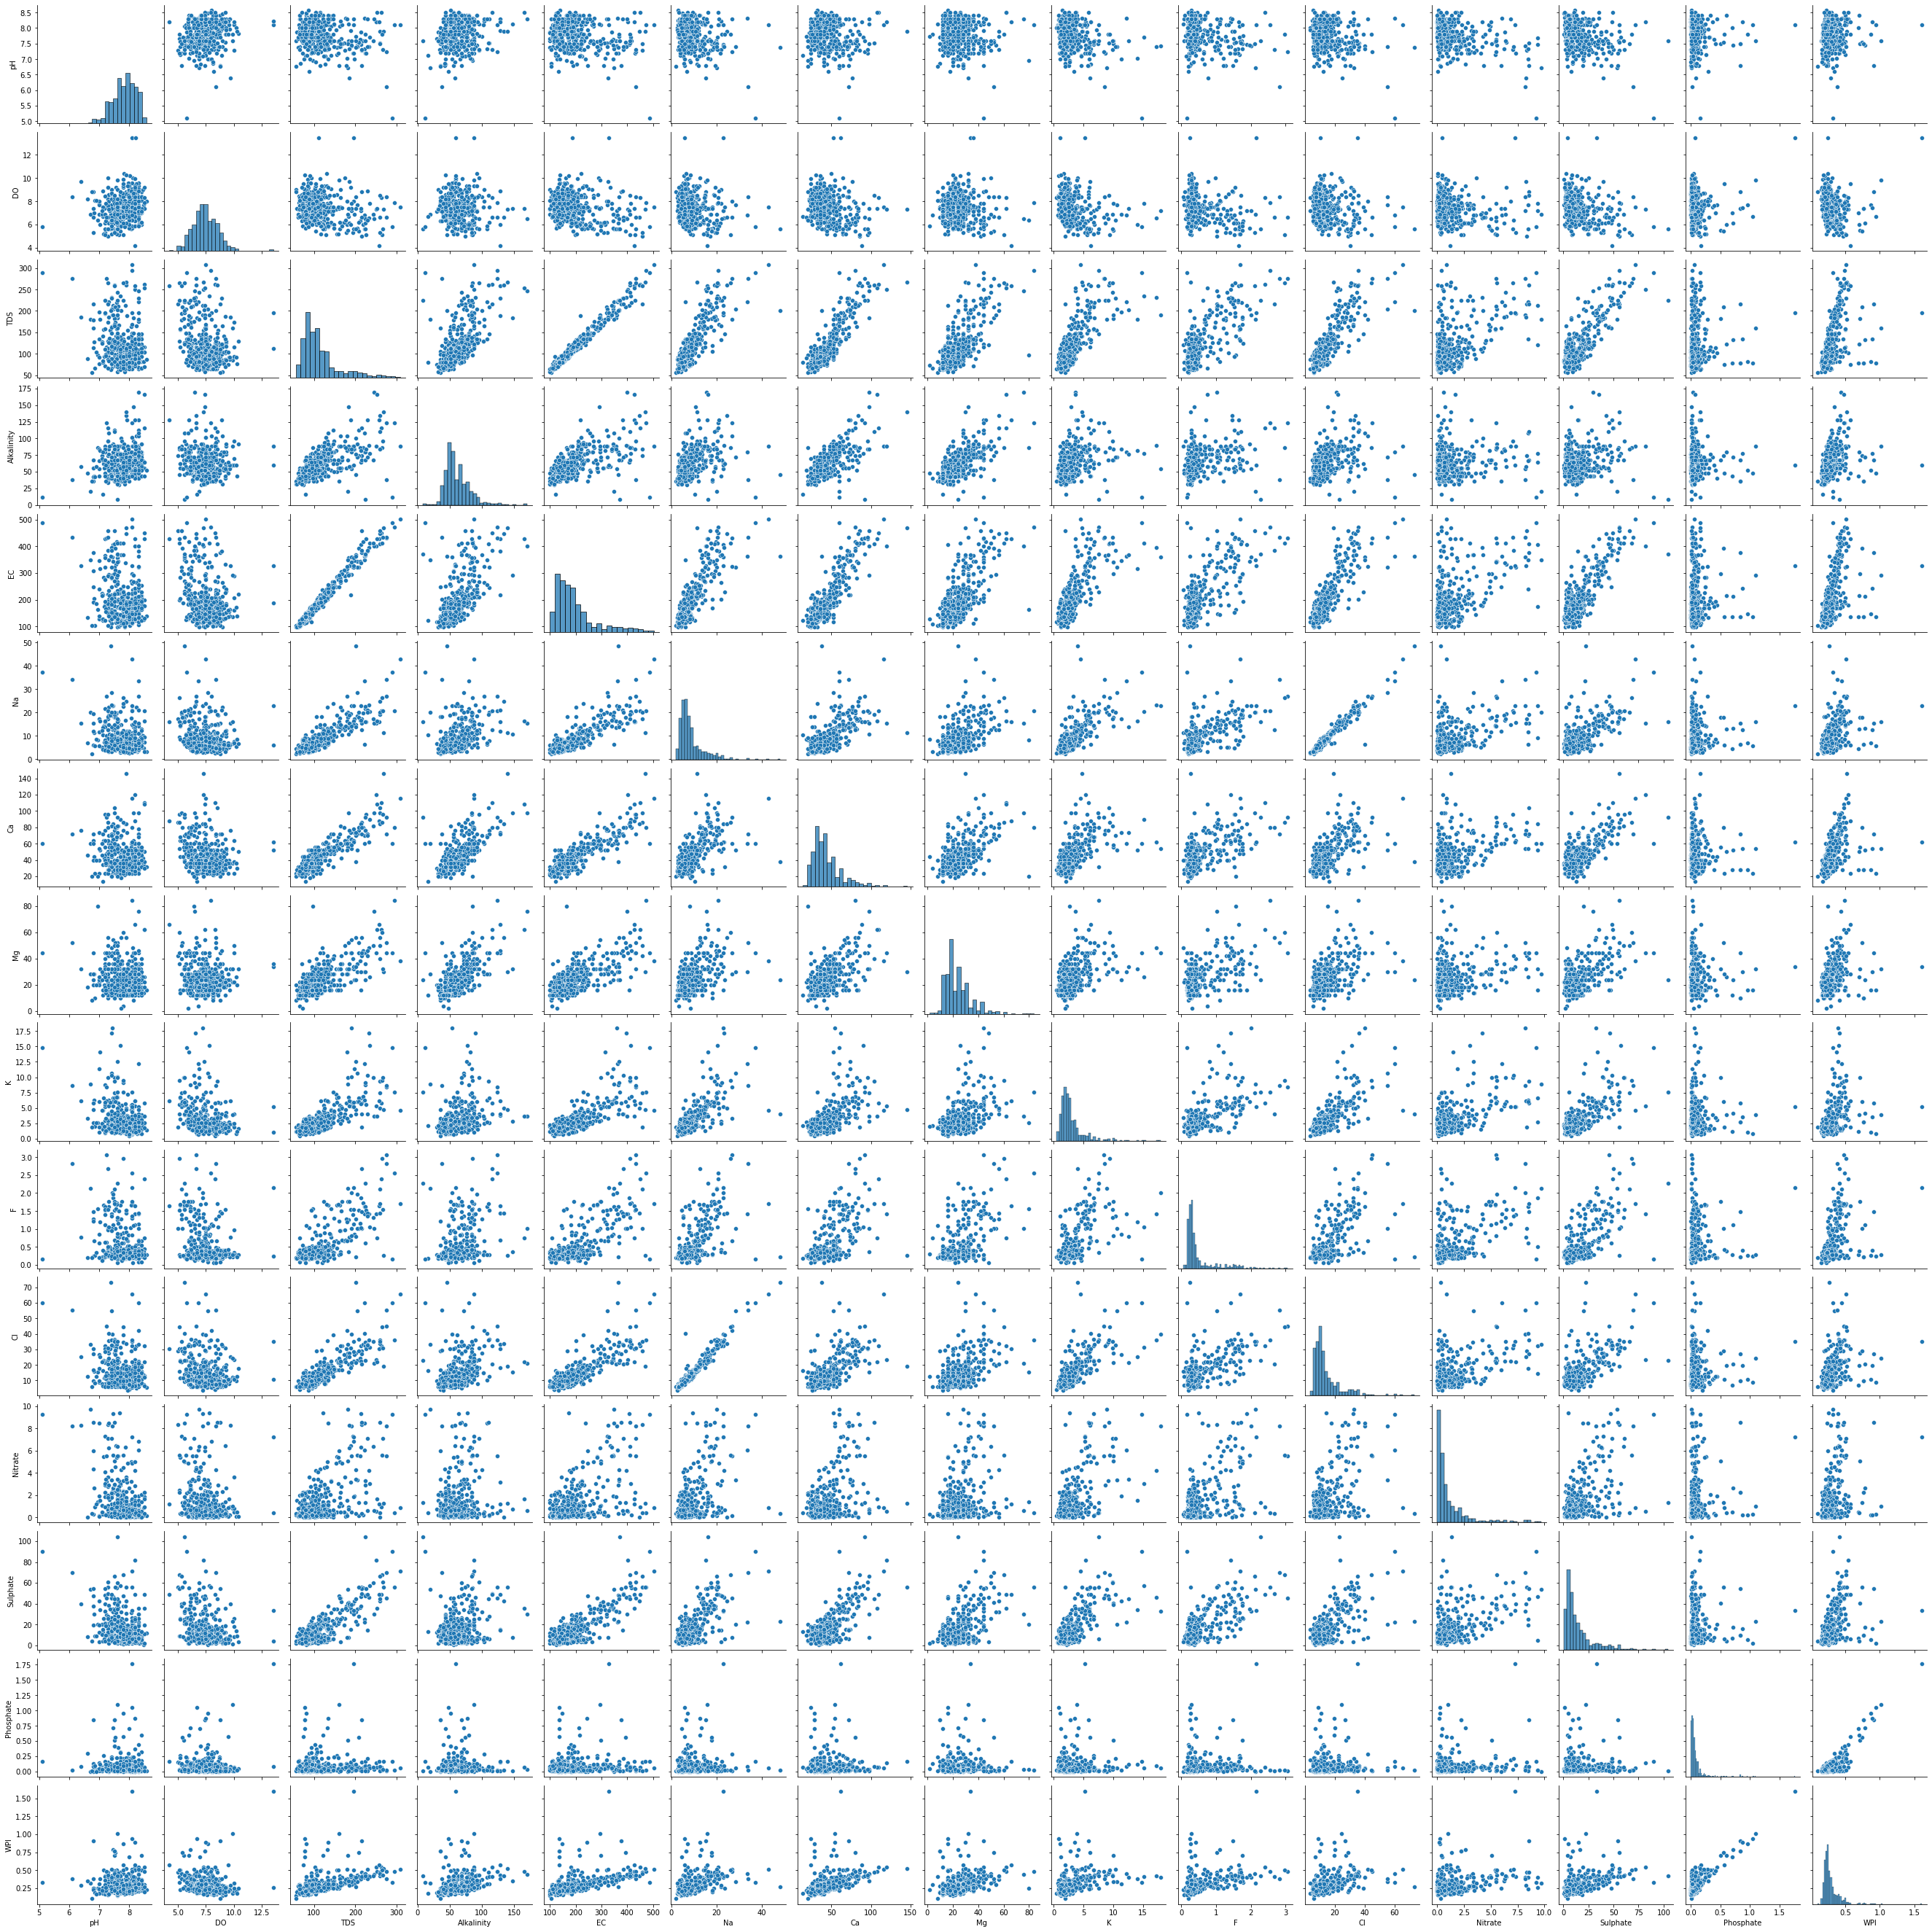

In [27]:
#plt.figure(figsize=(16, 6))
#sns.pairplot(df)

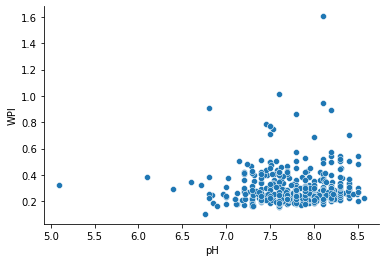

In [36]:
sns.scatterplot(x=df['pH'], y=df['WPI']);


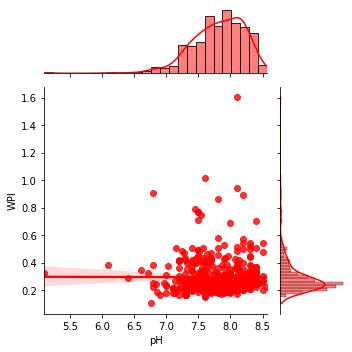

In [37]:
g = sns.jointplot("pH", "WPI", data=df,height=5,kind="reg",ratio=3, color="r")

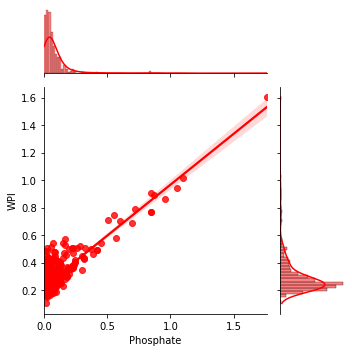

In [38]:
g = sns.jointplot("Phosphate", "WPI", data=df,height=5,kind="reg",ratio=3, color="r")

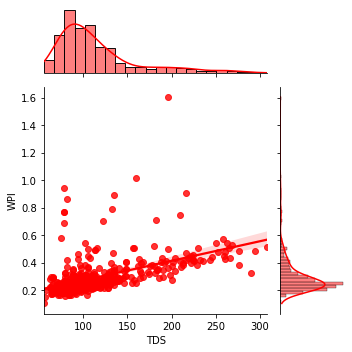

In [39]:
g = sns.jointplot("TDS", "WPI", data=df,height=5,kind="reg",ratio=3, color="r")

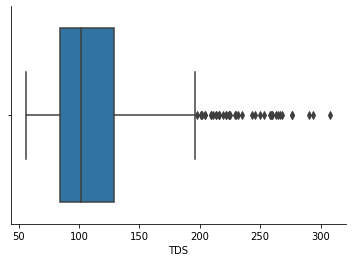

In [48]:
sns.boxplot(df['TDS'])

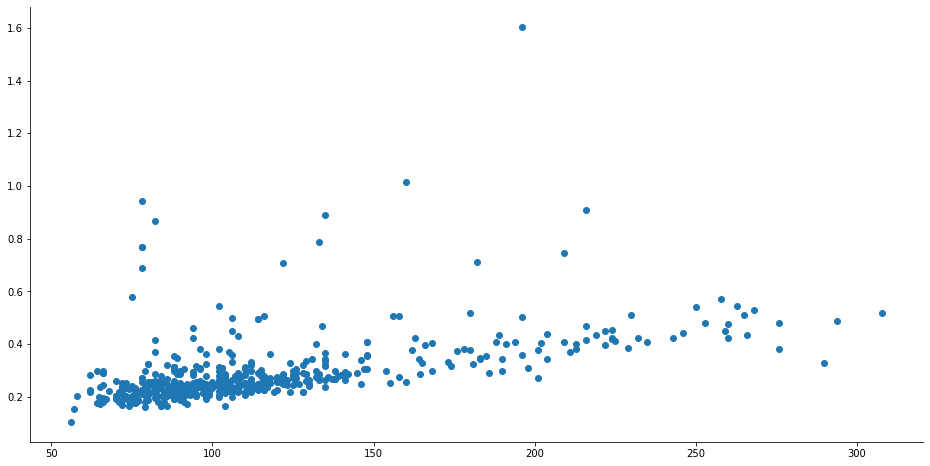

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['TDS'], df['WPI'])

In [52]:
#to get interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


pH             0.550000
DO             1.400000
TDS           45.000000
Alkalinity    22.000000
EC            80.000000
Na             4.950000
Ca            20.000000
Mg            12.000000
K              1.630000
F              0.217000
Cl             7.800000
Nitrate        1.280654
Sulphate      12.486000
Phosphate      0.067300
WPI            0.090638
dtype: float64


In [55]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(344, 16)

In [56]:
df.shape

(485, 16)

In [57]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 476
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          344 non-null    float64
 1   DO          344 non-null    float64
 2   TDS         344 non-null    float64
 3   Alkalinity  344 non-null    float64
 4   EC          344 non-null    float64
 5   Na          344 non-null    float64
 6   Ca          344 non-null    float64
 7   Mg          344 non-null    float64
 8   K           344 non-null    float64
 9   F           344 non-null    float64
 10  Cl          344 non-null    float64
 11  Nitrate     344 non-null    float64
 12  Sulphate    344 non-null    float64
 13  Phosphate   344 non-null    float64
 14  WPI         344 non-null    float64
 15  WQC         344 non-null    object 
dtypes: float64(15), object(1)
memory usage: 45.7+ KB
